<a href="https://colab.research.google.com/github/nikoshaa/2141720007-machine-learning-2023/blob/main/Week-08/UTS_Clustering_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentasi Gambar dengan Clustering**

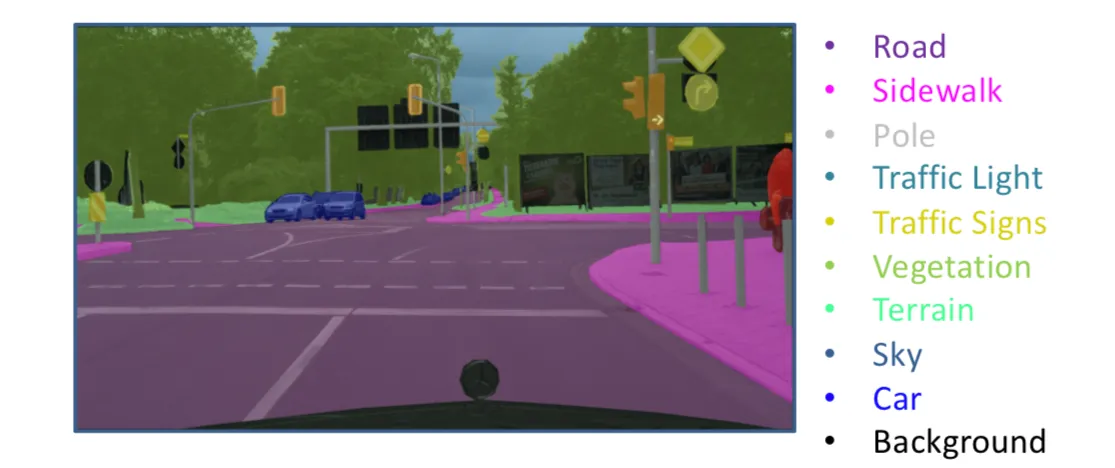

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

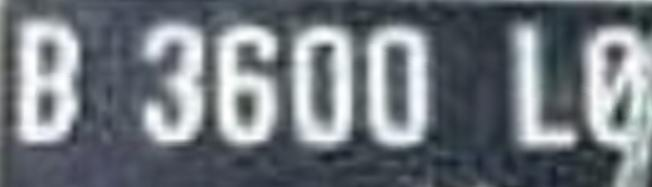

**Ketentuan UTS**

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

**Jawaban**

Impor Library

In [ ]:
# Import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt

Load Images

In [ ]:
# Load Images
image_files = [
    'E-5026-SF-06-18.jpg',
    'E-4836-QM-10-19.jpg',
    'E-3524-PAG-09-21.jpg',
    'E-4235-PAL-04-22.jpg',
    'E-4016-TO-08-22.jpg'
]

img_list = [cv2.imread(f'Dataset/{image_file}') for image_file in image_files]

Checking Image Shape Attribute

In [ ]:
# Check Images
for i, img in enumerate(img_list, start=1):
    if img is not None:
        h, w, ch = img.shape
        print(f"Image {i}: Height = {h}, Width = {w}, Channels = {ch}")
    else:
        print(f"Image {i} is not loaded.")

Image 1: Height = 300, Width = 778, Channels = 3
Image 2: Height = 109, Width = 269, Channels = 3
Image 3: Height = 165, Width = 455, Channels = 3
Image 4: Height = 166, Width = 380, Channels = 3
Image 5: Height = 179, Width = 432, Channels = 3


Processing Reshape Data

In [ ]:
# Process Images
def process_image(img):
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

data_list = [process_image(img) for img in img_list]

In [ ]:
# Check Processed Data
for i, data in enumerate(data_list, start=1):
    print(f"Data {i} Shape = {data.shape}")

Data 1 Shape = (233400, 3)
Data 2 Shape = (29321, 3)
Data 3 Shape = (75075, 3)
Data 4 Shape = (63080, 3)
Data 5 Shape = (77328, 3)


Visualize Image with Scatter Plot

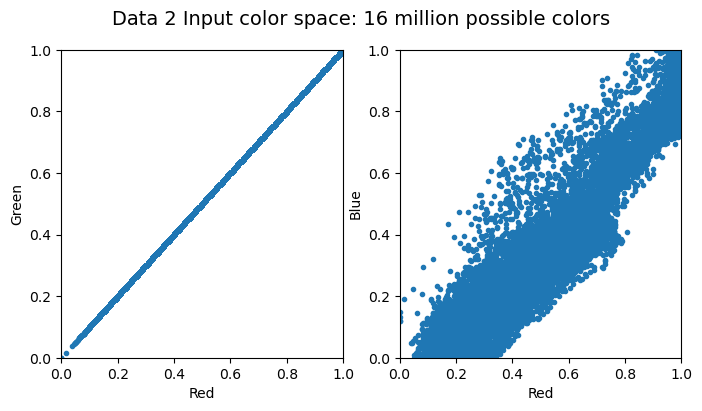

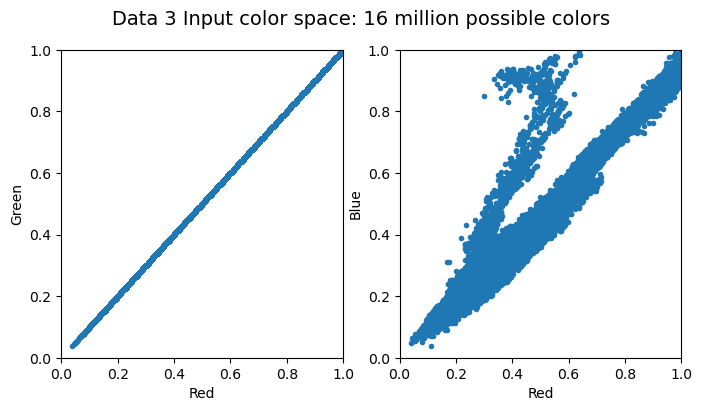

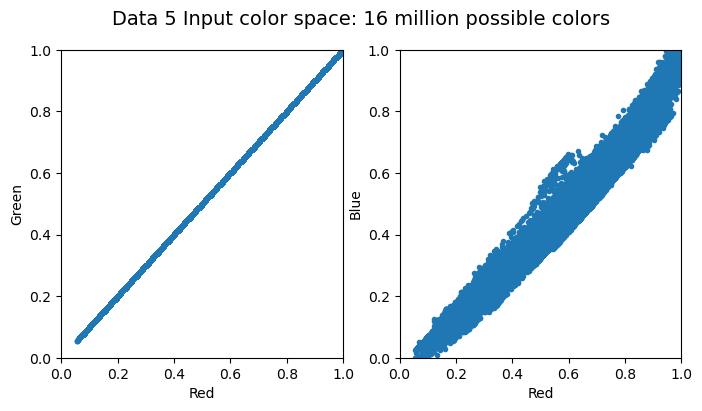

In [ ]:
import matplotlib.pyplot as plt

def plot_pixels(data, title):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    R, G, B = data.T

    for a, channel, label in zip(ax, [R, B], ['Green', 'Blue']):
        a.scatter(R, channel, marker='.')
        a.set(xlabel='Red', ylabel=label, xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

# Proses dan plot semua data
for i, (img, data) in enumerate(zip(img_list, data_list), start=1):
    if img is not None:
        plot_pixels(
            data, title=f'Data {i} Input color space: 16 million possible colors')
    else:
        print(f"Image {i} is not loaded.")

plt.show()

In [ ]:
processed_pixel_vals_list = []

for img in img_list:
    if img is not None:
        # Reshape and convert pixel values to float32
        pixel_vals = img.reshape((-1, 3))
        pixel_vals = np.float32(pixel_vals)

        # Append the processed pixel values to the list
        processed_pixel_vals_list.append(pixel_vals)

In [ ]:
# K-means clustering parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2

# Create a list to store clustered images
clustered_images = []

# Create a figure to display all images
plt.figure(figsize=(12, 12))

# Ensure that 'i' is within the valid range
for i, pixel_vals in enumerate(processed_pixel_vals_list):
    if i < len(img_list):
        # Perform k-means clustering
        retval, labels, centers = cv2.kmeans(
            pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Convert data into 8-bit values
        centers = np.uint8(centers)
        segmented_data = centers[labels.flatten()]

        # Reshape data into the original image dimensions
        segmented_image = segmented_data.reshape((img_list[i].shape))
        clustered_images.append(segmented_image)

        # Display the original and clustered images in subplots
        plt.subplot(5, 2, 2 * i + 1)  # 5 rows, 2 columns
        plt.imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image {i + 1}')

        plt.subplot(5, 2, 2 * i + 2)  # 5 rows, 2 columns
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Clustered Image {i + 1}')

plt.tight_layout()
plt.show()

Evaluasi Hasil Segmentasi

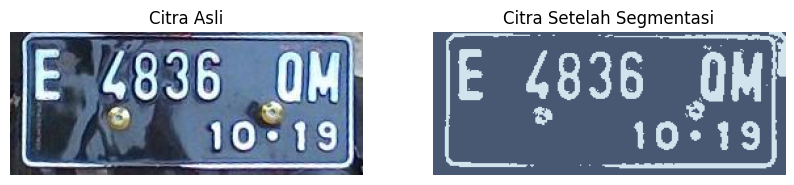

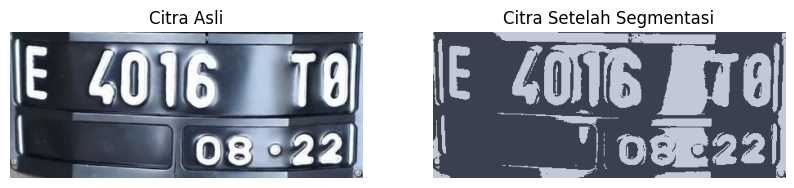

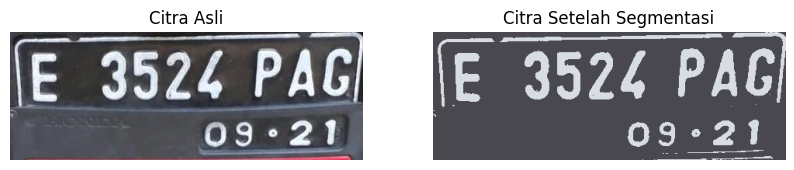

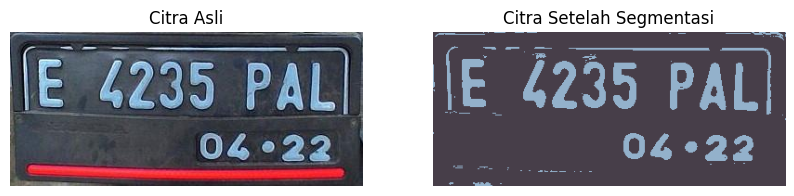

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Fungsi untuk segmentasi citra dengan algoritma K-Means
def kmeans_segmentation(image, k=2):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    attempts = 10
    vectorized = image.reshape((-1, 3))
    vectorized = vectorized.astype(np.float32)

    ret, label, center = cv2.kmeans(vectorized, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    center = center.astype(np.uint8)
    res = center[label.flatten()]
    segmented_image = res.reshape(image.shape)

    return segmented_image

# Path ke folder yang berisi citra plat nomor
folder_path = 'Dataset/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Menggunakan algoritma K-Means untuk segmentasi
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    segmented_image = kmeans_segmentation(image_rgb, k=2)

    # Menampilkan citra sebelum dan sesudah segmentasi
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title('Citra Setelah Segmentasi')
    plt.axis('off')

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


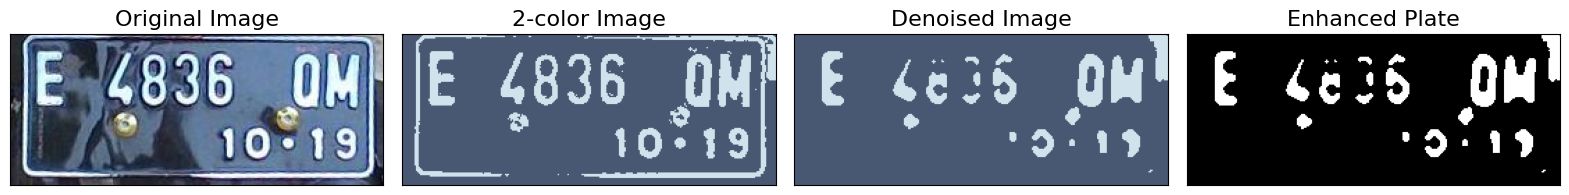

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


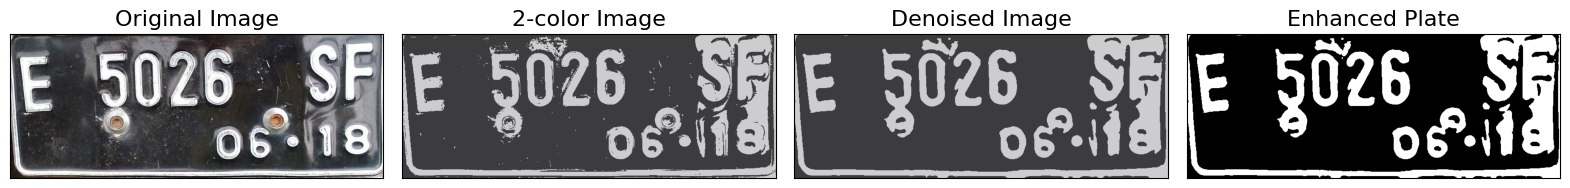

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


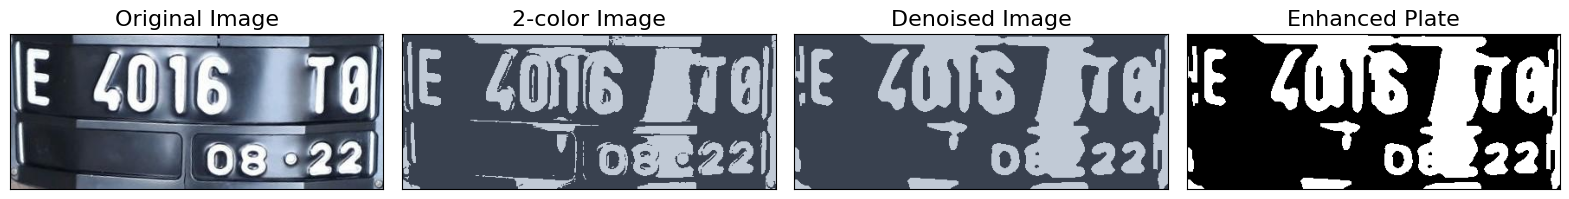

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


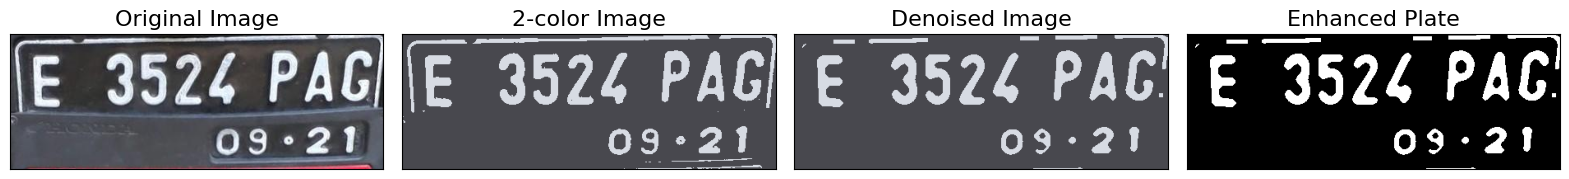

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


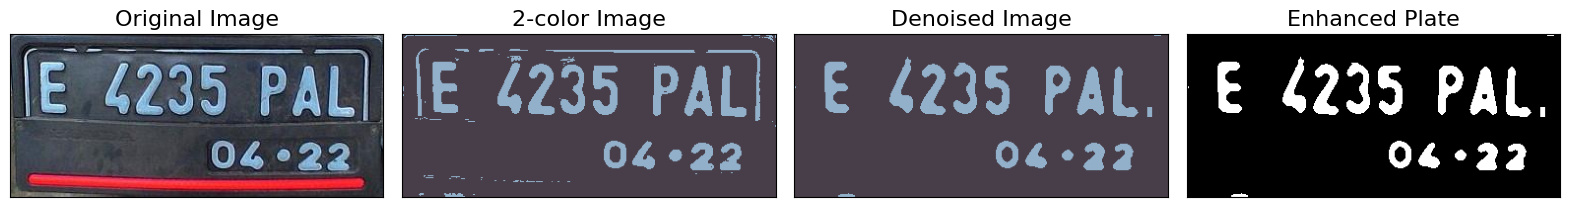

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Fungsi untuk menghilangkan noise
def remove_noise(image):
    return cv2.medianBlur(image, 9)

# Path ke folder yang berisi gambar
folder_path = 'Dataset/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored)
    enhanced_plate = enhance_plate(denoised_image)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 4, figsize=(
        20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


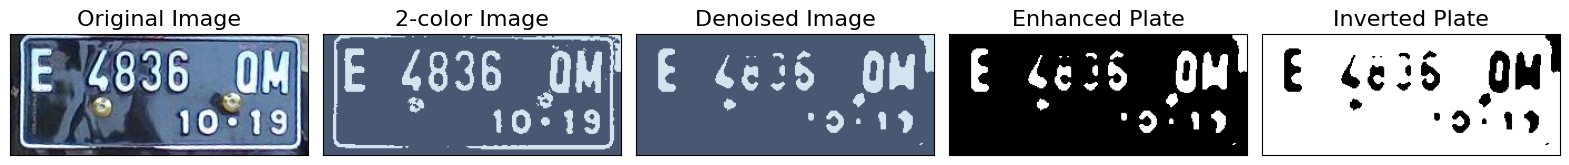

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


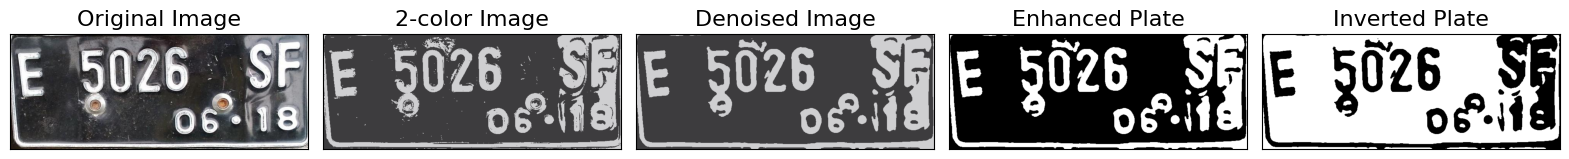

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


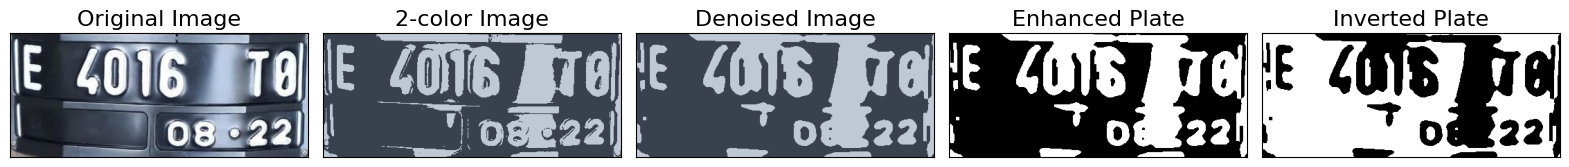

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


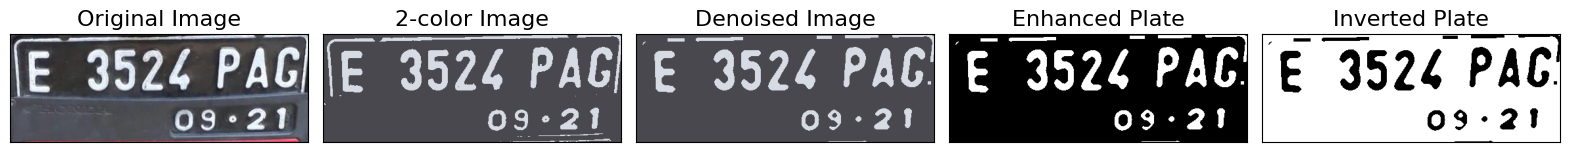

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


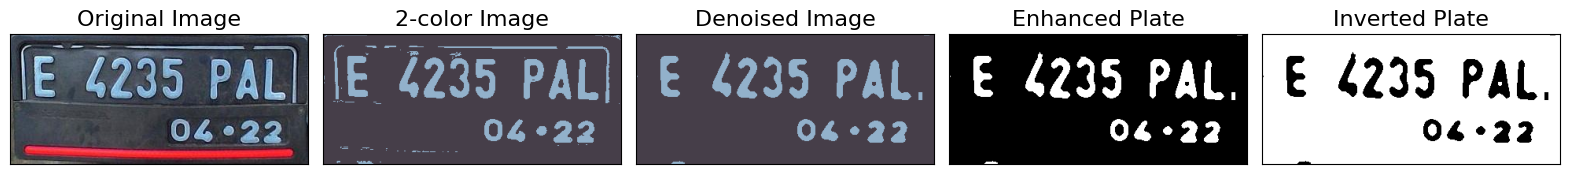

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat dengan logika if
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Logika if untuk memastikan bahwa angka menjadi putih dan background menjadi hitam
    if np.mean(thresh) > 128:
        thresh = cv2.bitwise_not(thresh)

    return thresh

# Fungsi untuk menghilangkan noise dengan ukuran kernel yang disesuaikan
def remove_noise(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Path ke folder yang berisi gambar
folder_path = 'Dataset/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(
    folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)  # Melakukan inversi warna

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(
        20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()

In [7]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


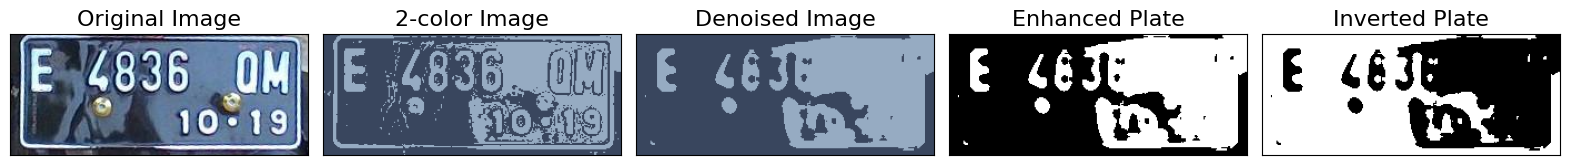

Hasil ekstraksi teks dari E-4836-QM-10-19.jpg:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


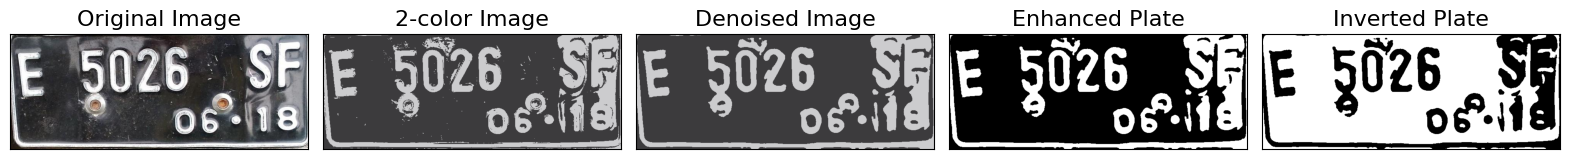

Hasil ekstraksi teks dari E-5026-SF-06-18.jpg:
 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


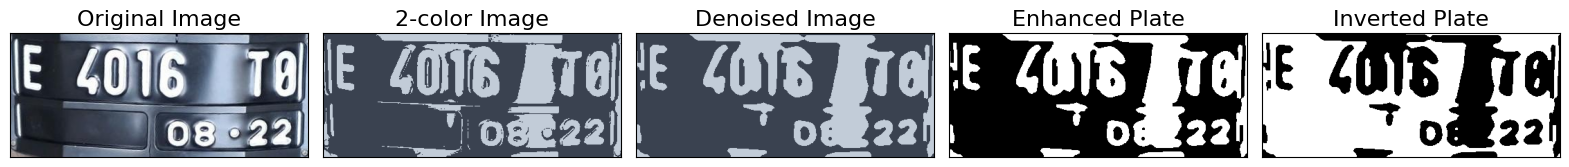

Hasil ekstraksi teks dari E-4016-TO-08-22.jpg:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


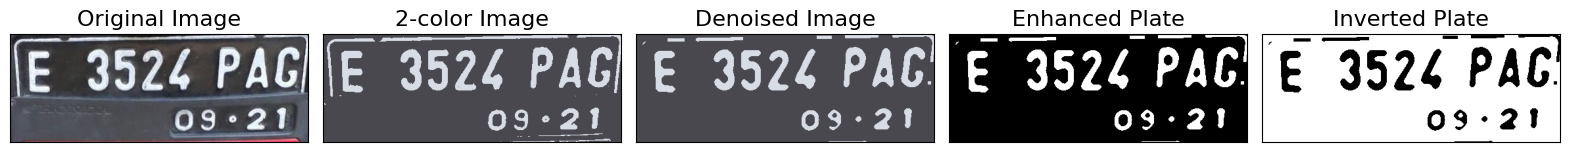

Hasil ekstraksi teks dari E-3524-PAG-09-21.jpg:
m |

524 PA

ww

Cc.

09-2!



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


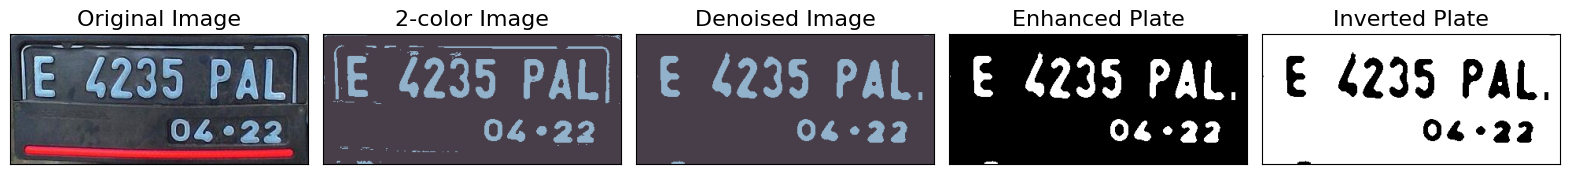

Hasil ekstraksi teks dari E-4235-PAL-04-22.jpg:
-€ 6235 PAL.
04°22



In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna gambar
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)
    return recolored

# Fungsi untuk meningkatkan kejelasan nomor plat
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    if np.mean(thresh) > 128:
        thresh = cv2.bitwise_not(thresh)

    return thresh

# Fungsi untuk menghilangkan noise
def remove_noise(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Fungsi untuk mengekstraksi teks dari gambar menggunakan pytesseract
def extract_text(image):
    return pytesseract.image_to_string(image)

# Path ke folder yang berisi gambar
folder_path = 'Dataset/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat untuk setiap gambar dalam folder
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)
    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)
    extracted_text = extract_text(inverted_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()
    print(f"Hasil ekstraksi teks dari {file_name}:")
    print(extracted_text)

Kesimpulan dari semua metode yang telah dilakukan adalah bahwa hasil dari nomor plat tidak dapat terbaca. Hal ini disebabkan oleh kondisi plat yang sudah rusak atau penyok.